Подключение импортов

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")

Задаем вспомогательные функции

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls

In [ ]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

Загрузка датасета

In [ ]:
df = pd.read_csv('kc_house_data.csv')

df.shape

(21613, 21)

Информация о датасете

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пустых значений нет

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Удалим лишние параметры

In [ ]:
df.drop("id",axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

Исследование зависимостей между параметрами

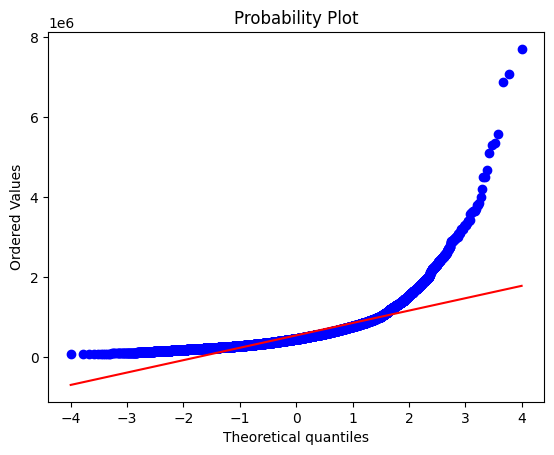

In [ ]:
import scipy.stats as stats
stats.probplot(df['price'], dist="norm", plot=plt)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


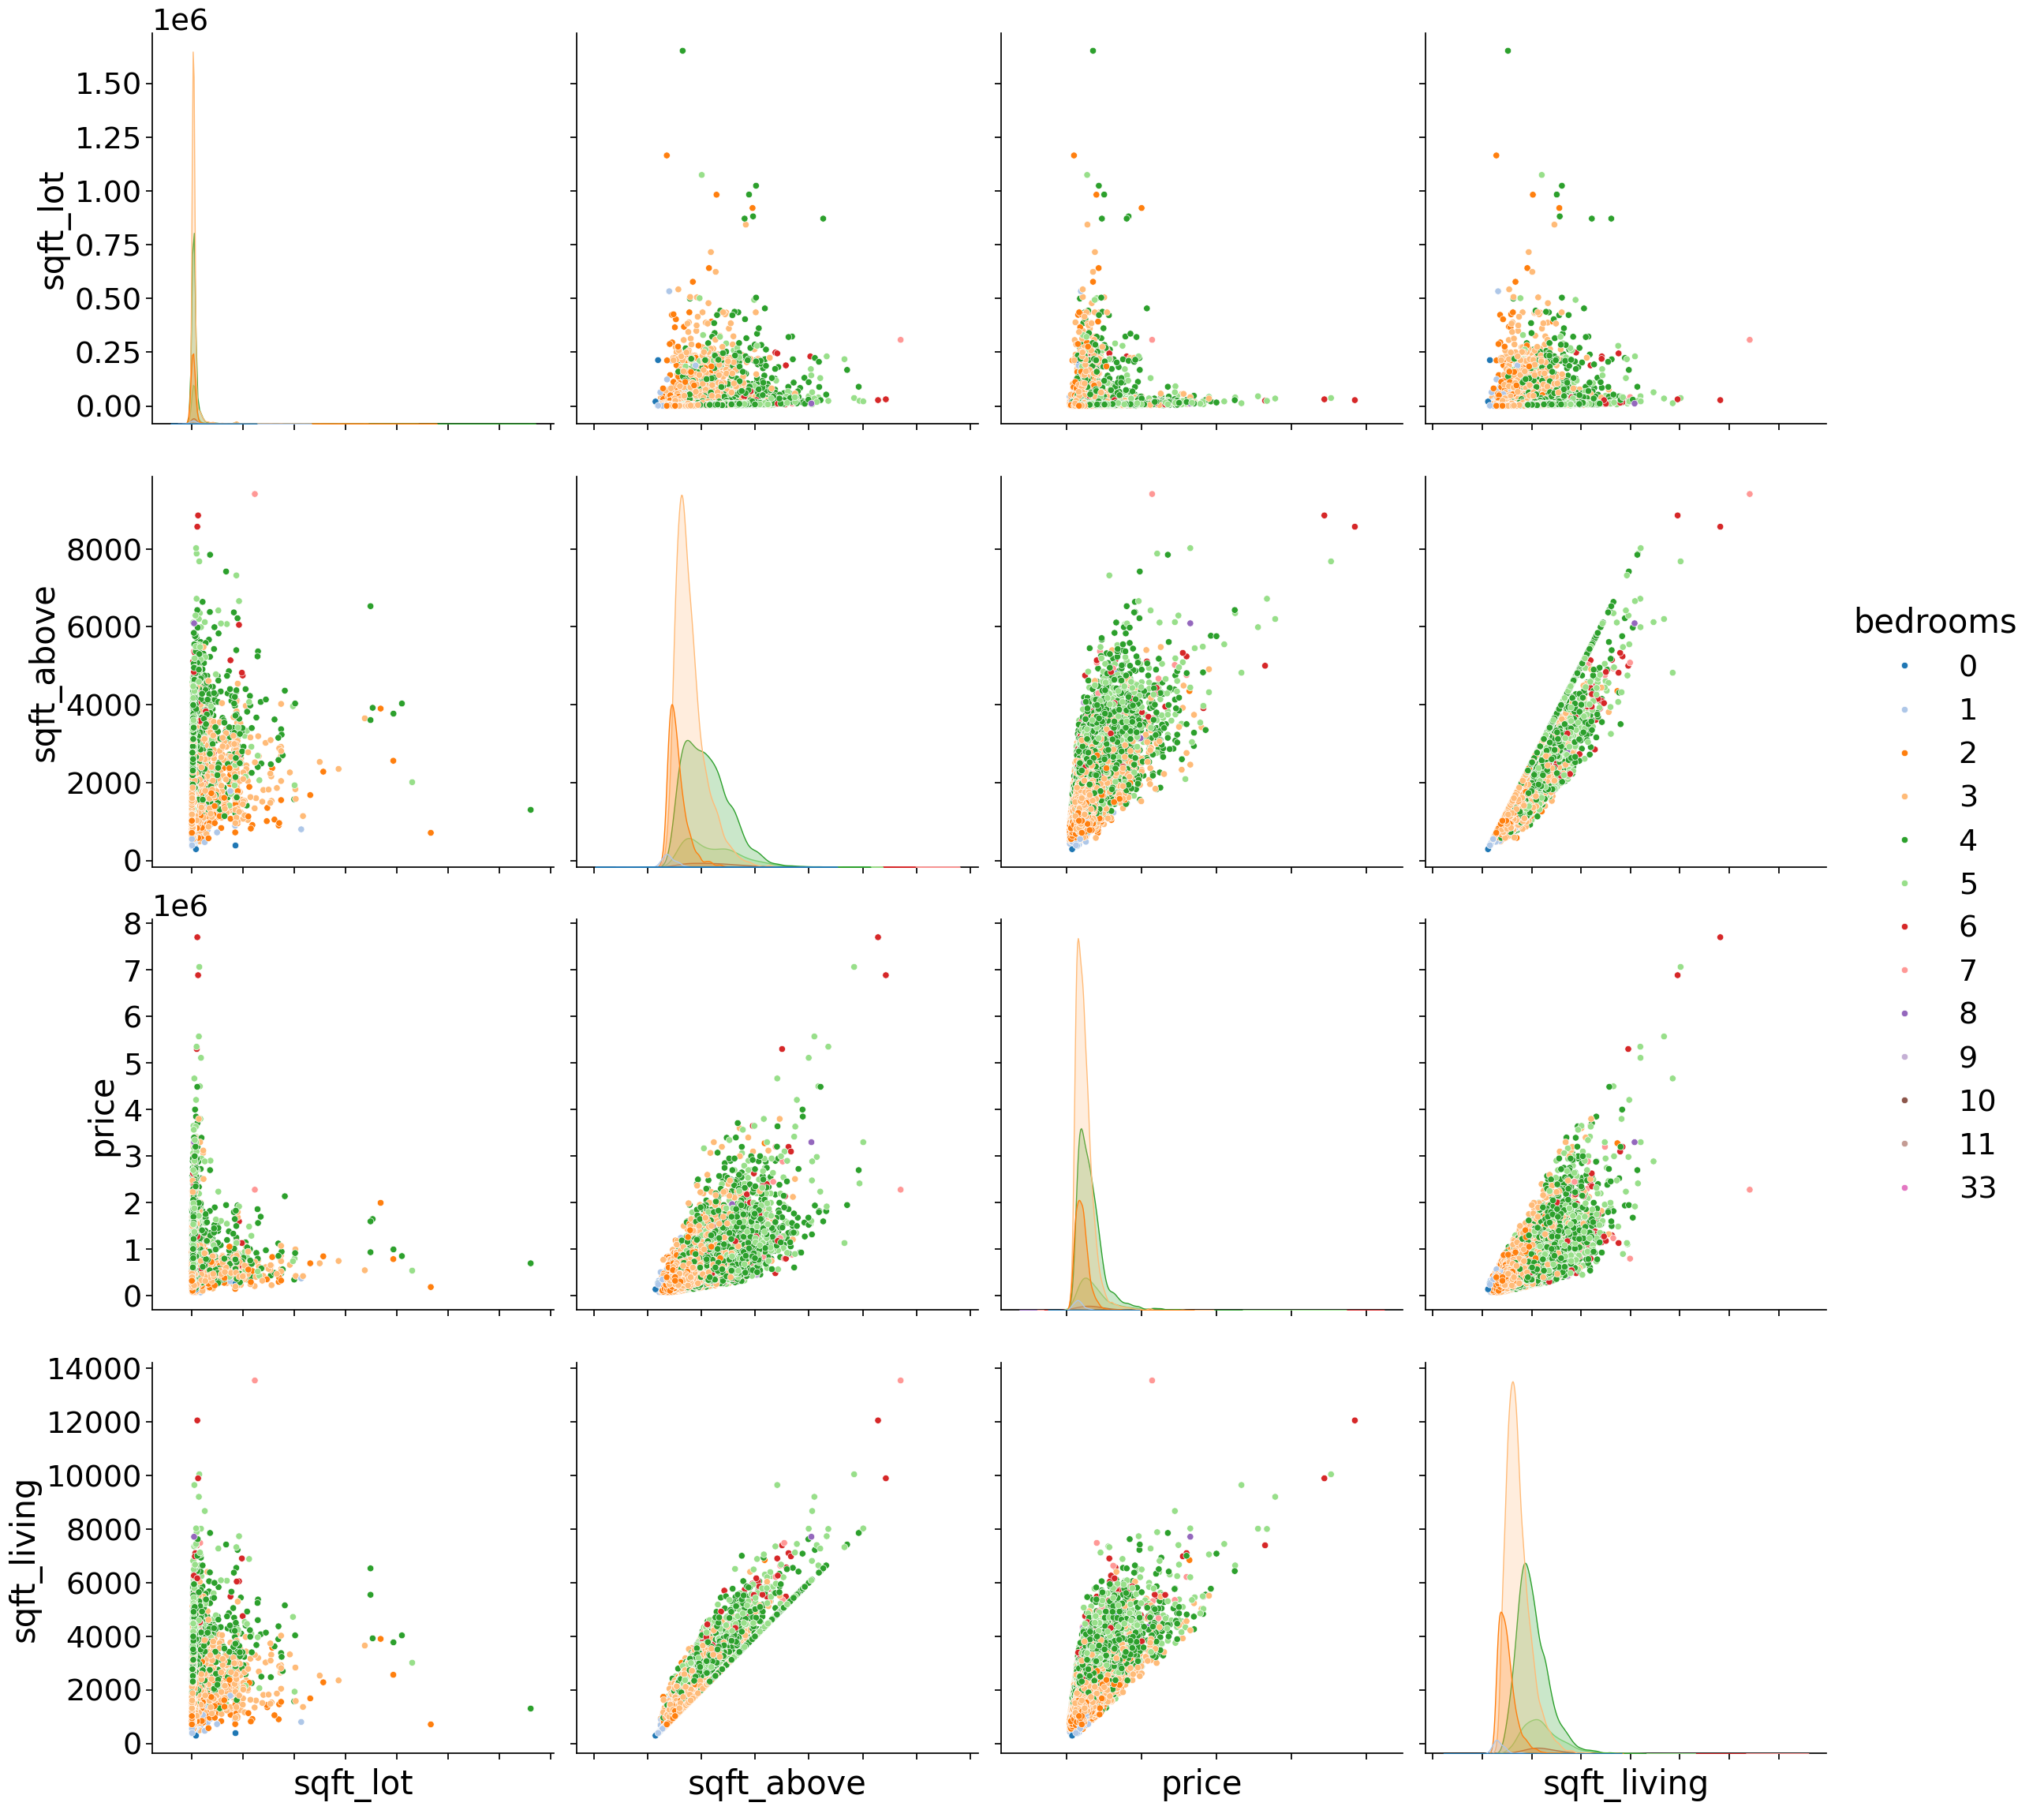

In [ ]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']],
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);



---



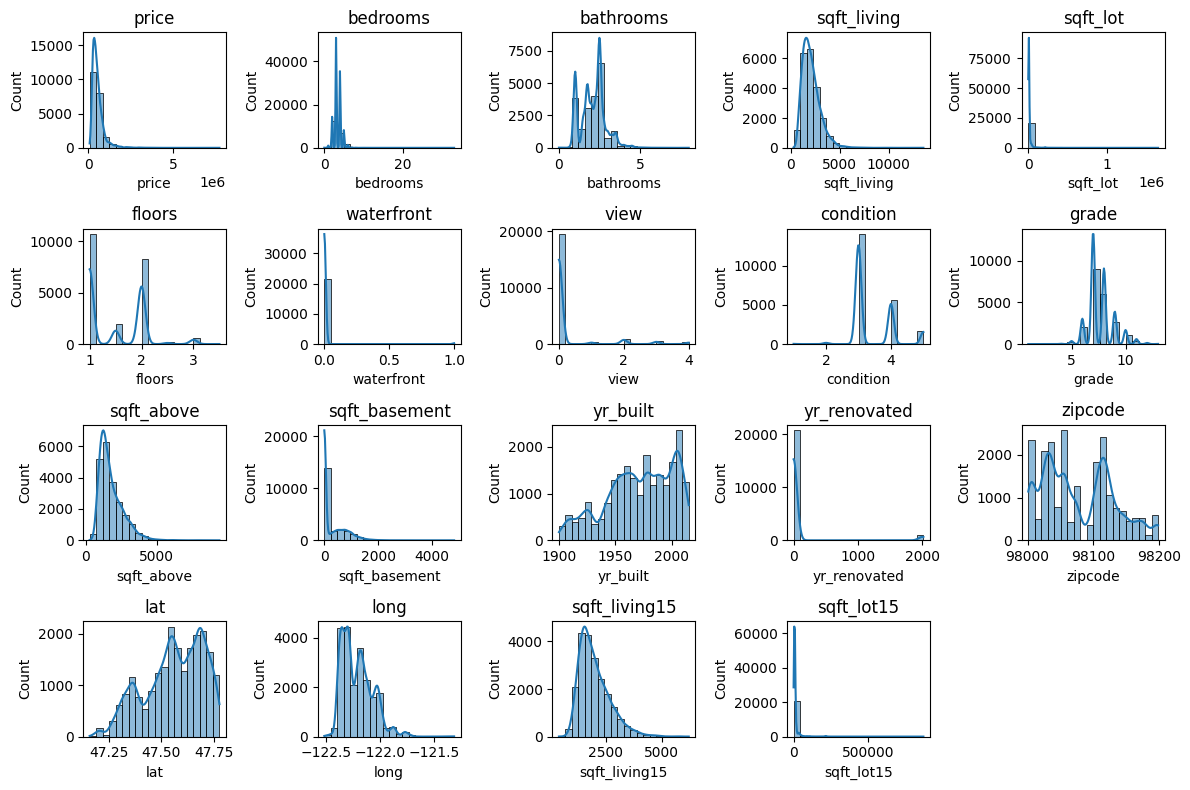

In [ ]:
plt.figure(figsize=(12, 8))
for feature in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
df["waterfront"].value_counts().reset_index()

,waterfront,count
0,0,21450
1,1,163


In [ ]:
df["view"].value_counts().reset_index()

,view,count
0,0,19489
1,2,963
2,3,510
3,1,332
4,4,319


In [ ]:
df["yr_renovated"].value_counts().reset_index()

,yr_renovated,count
0,0,20699
1,2014,91
2,2013,37
3,2003,36
4,2005,35
...,...,...
65,1951,1
66,1959,1
67,1948,1
68,1954,1


У параметров "waterfront","view","yr_renovated" наблюдается большое количество 0 значений

Посмотрим на зависимость параметров друг от друга

In [ ]:
plotScatterMatrix(df, 20, 10)

TypeError: DataFrame.dropna() takes 1 positional argument but 2 were given

Есть зависимость price от параметров  : bedrooms, bathrooms, sqft_living,sqft_lot. Также у этих параметров (bedrooms, bathrooms, sqft_living, sqft_lot) наблюдается зависимость друг от друга. В остальных случаях очень слабые зависимости.

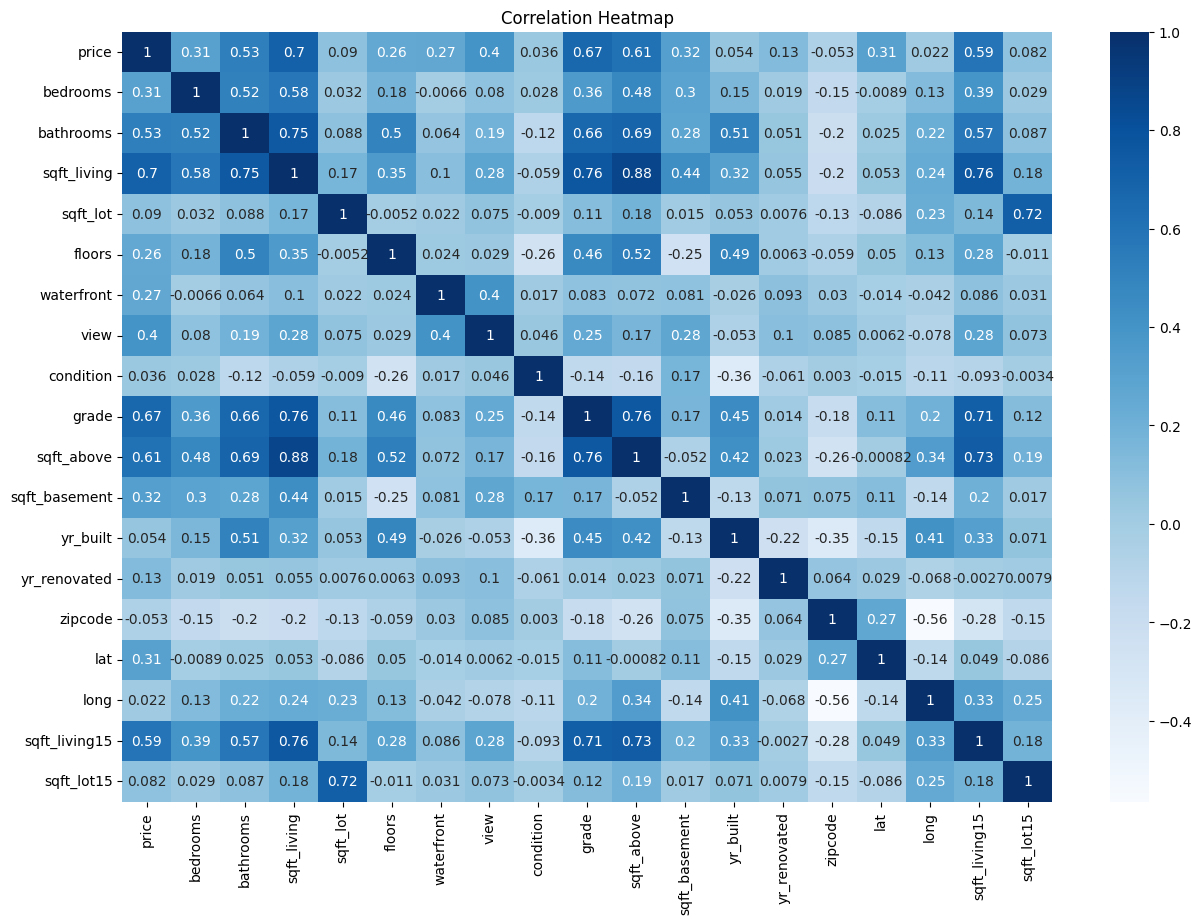

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Присутствует большое кол-во признаков со средней корреляций отнисительно price: (bedrooms, bathrooms, view, grade, sqft_above, sqft_basement, lat, sqft_living15) и один параметр sqft_living который очень сильно коррелирует с price

Проверим наличие выбросов в наших данных

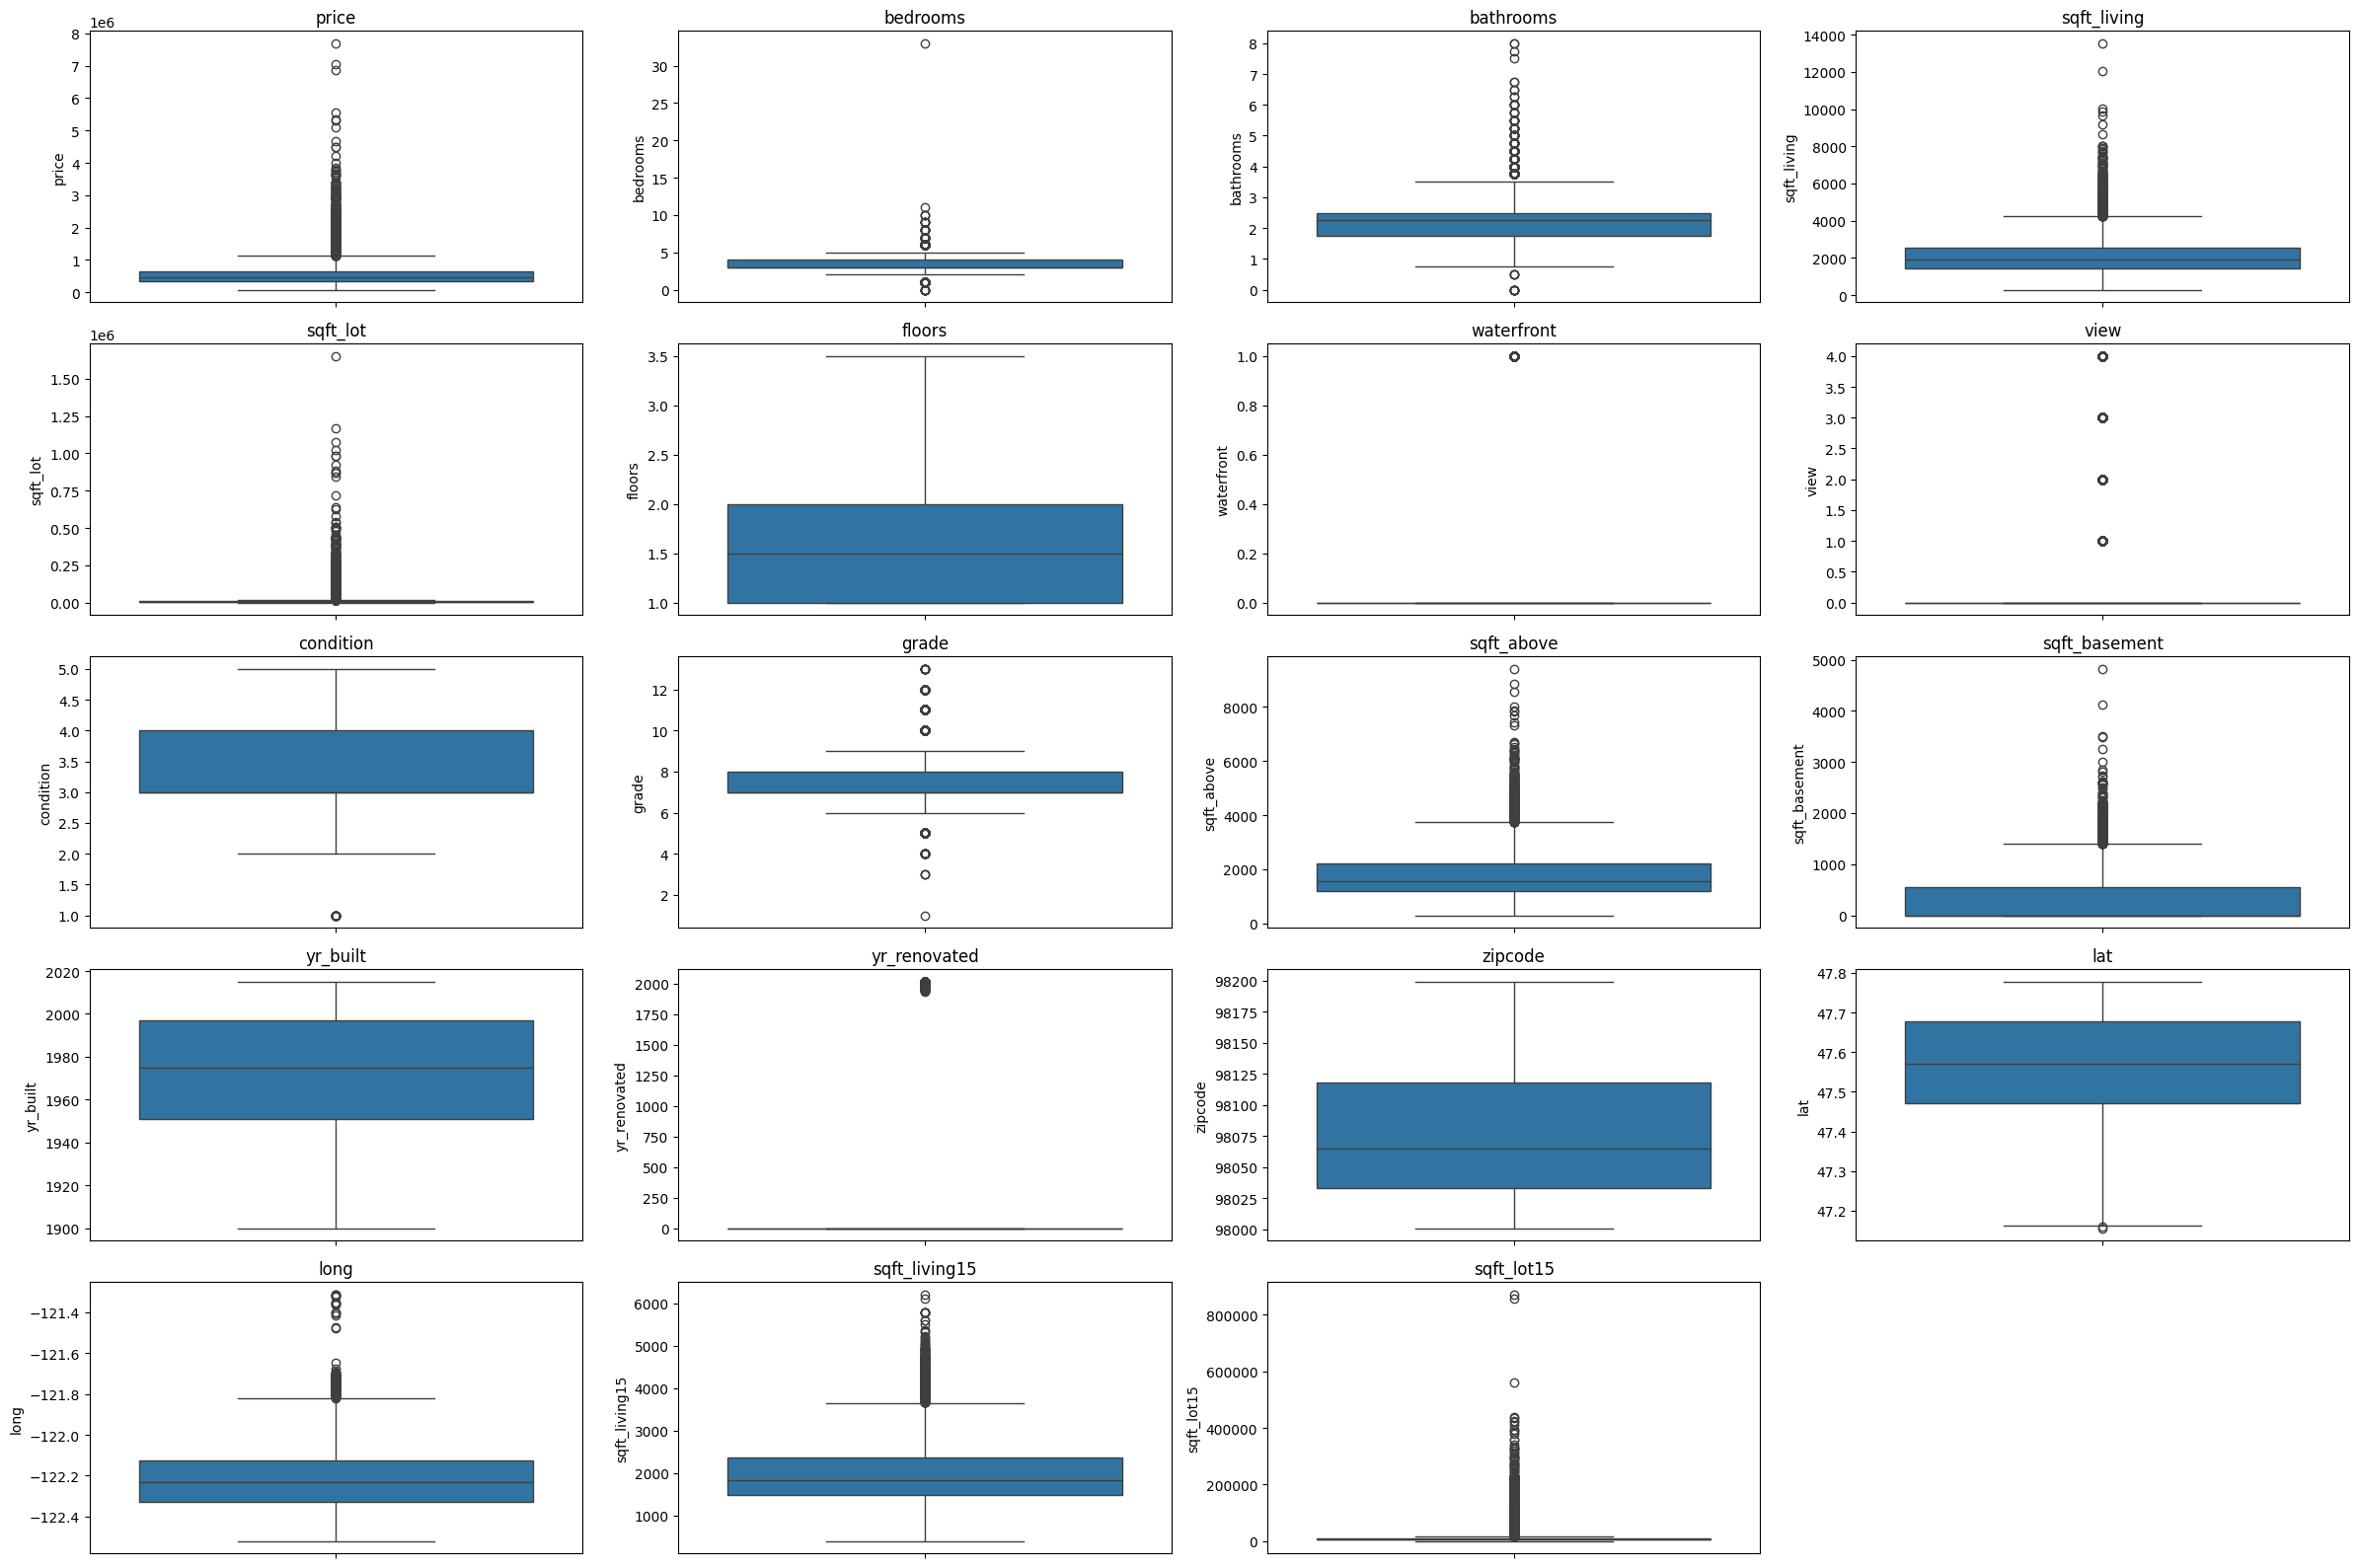

In [ ]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(5, 4, df.columns.to_list().index(feature)+1)
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

У нас наблюдается большое количество выбросов

Удалим выбросы

In [ ]:
numeric_columns = df.drop(["waterfront","view","zipcode","yr_renovated","grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]

In [ ]:
index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(df,featsure))

In [ ]:
df = remove(df,index_list)

In [ ]:
df.shape

(17492, 19)

Данные после удаления выбросов

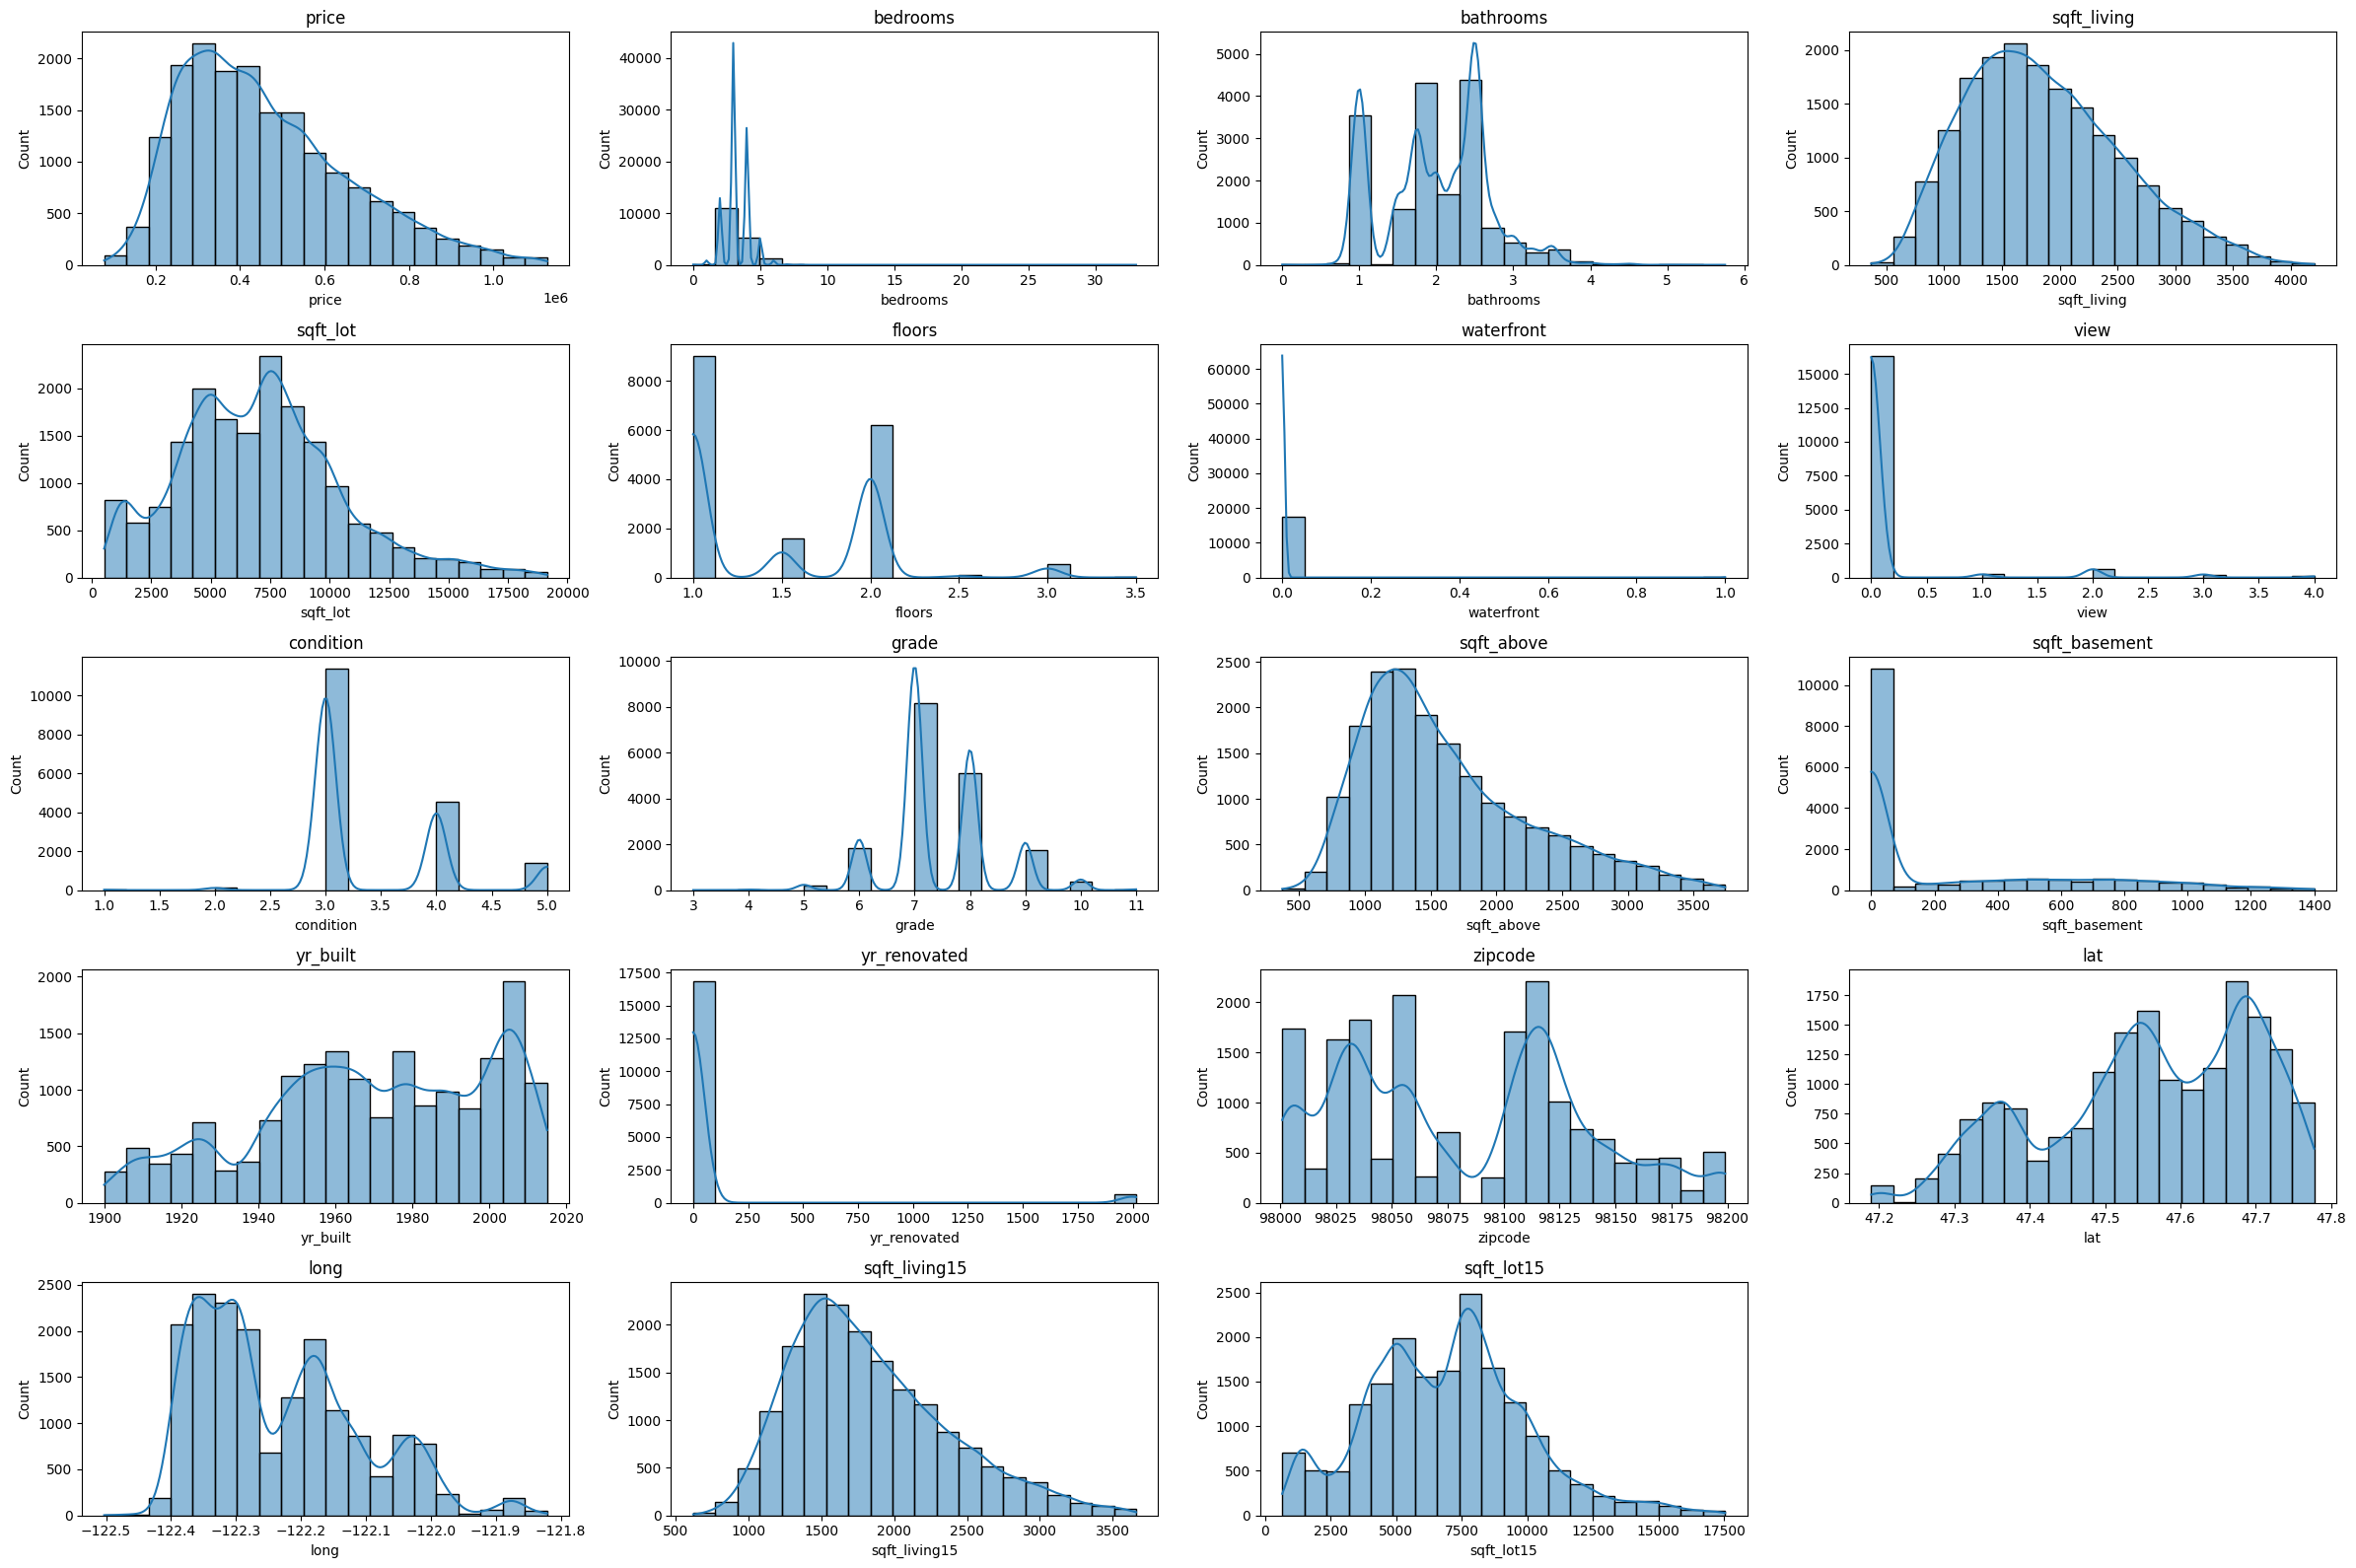

In [ ]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(5, 4, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

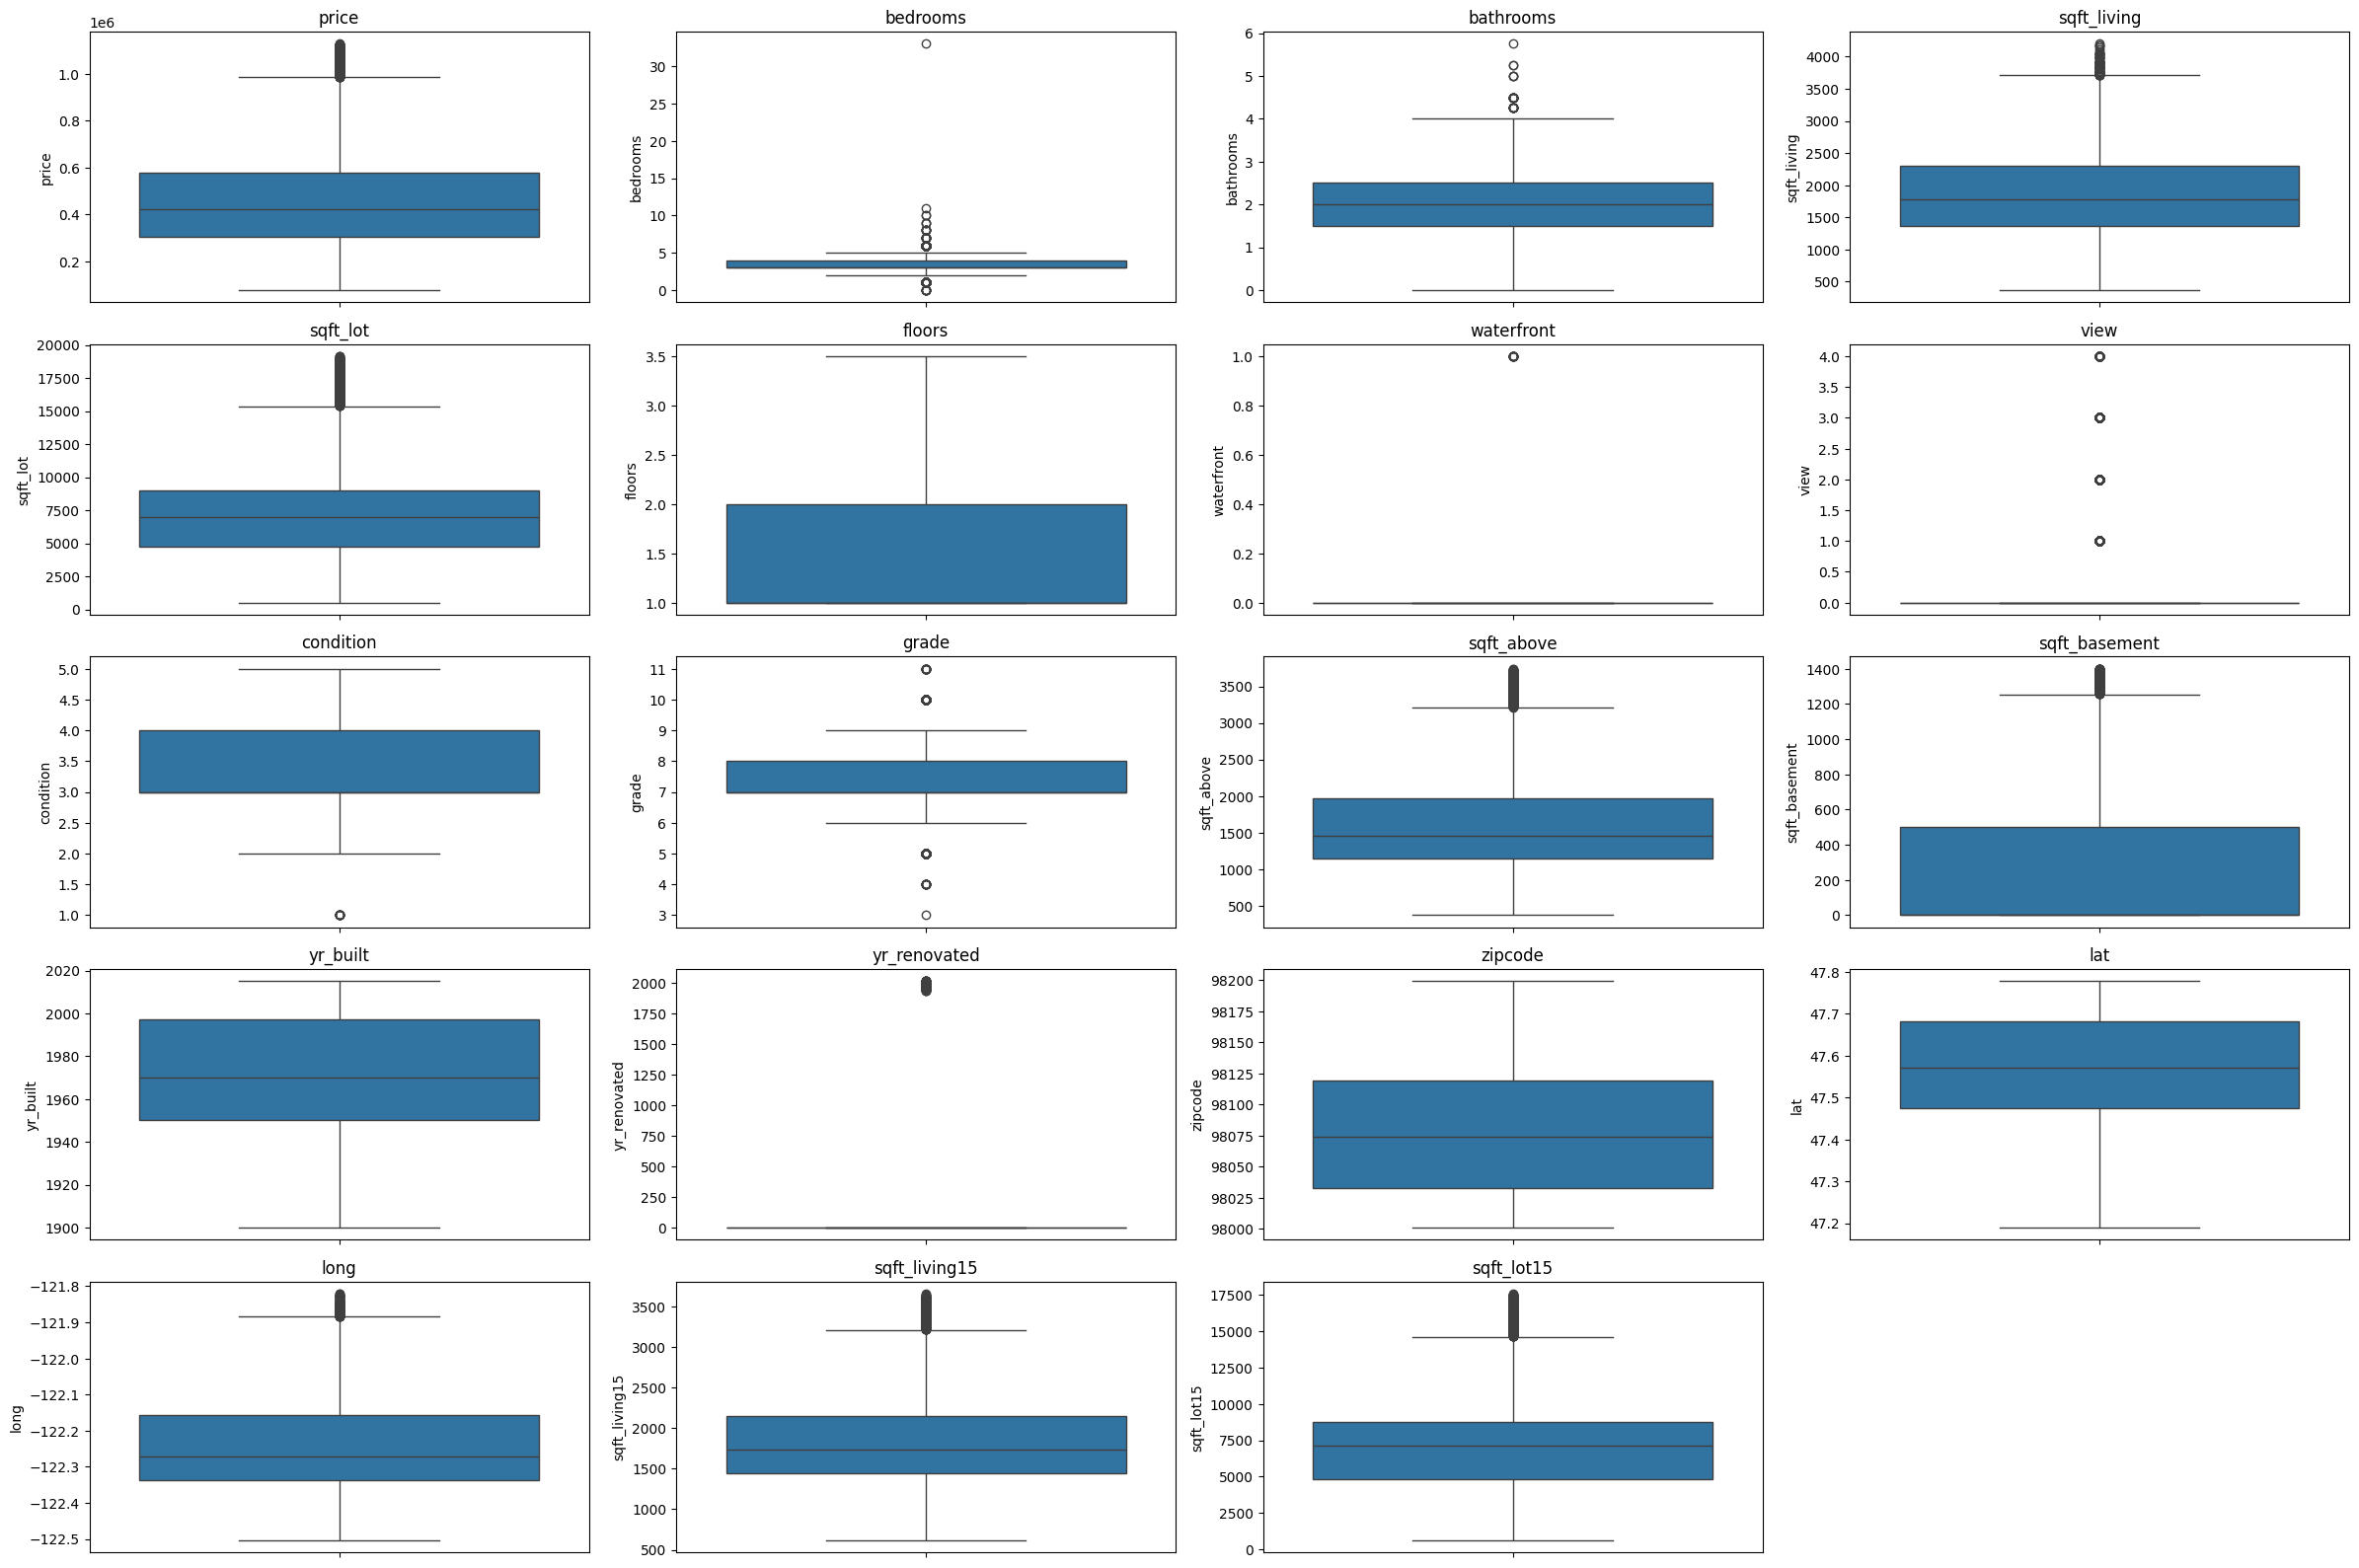

In [ ]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(5, 4, df.columns.to_list().index(feature)+1)
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

Выбросов значительно меньше. Теперь можно построить матрицу корреляции вновь и посмотреть на изменения

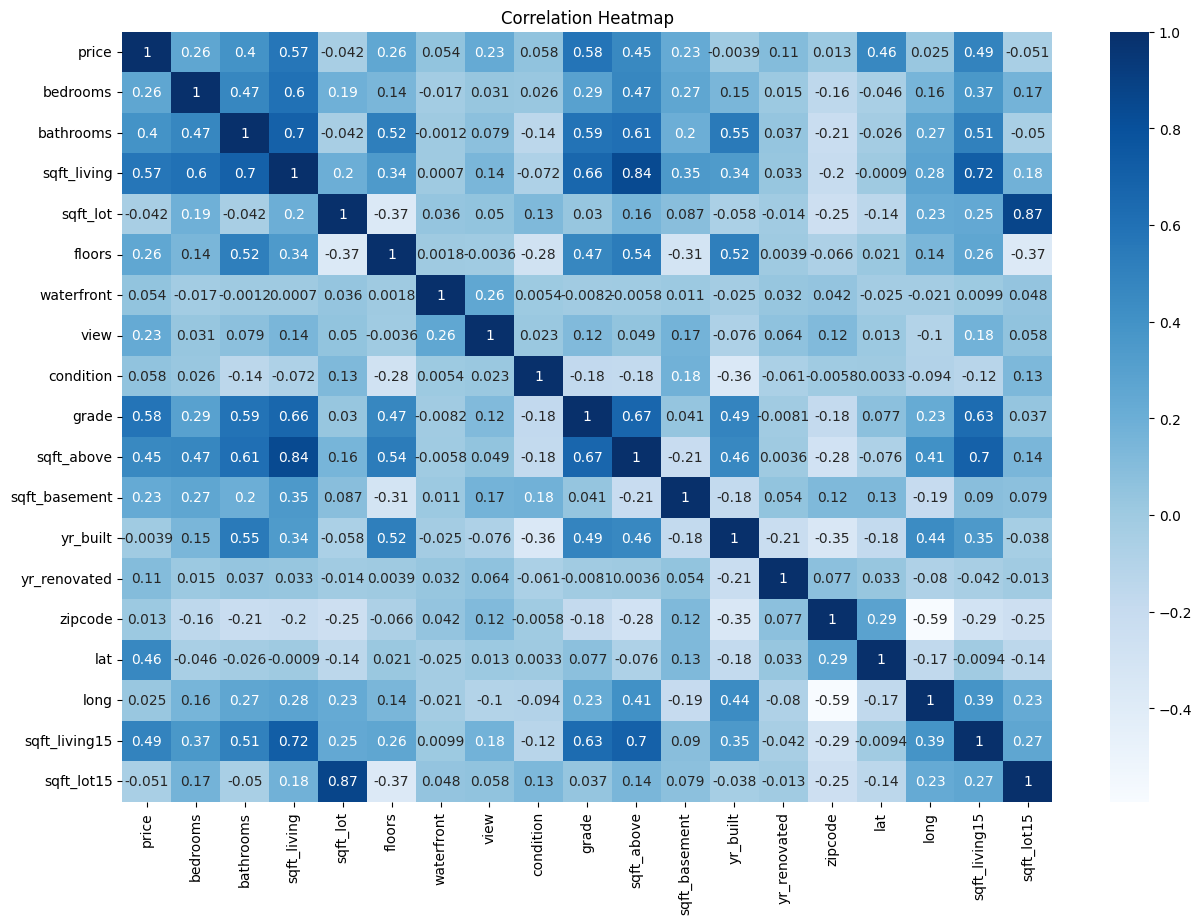

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

По итогу с ценой неплохо коррелируют такие признаки: bathrooms, sqft_living, grade, sqft_above, lat, sqft_living15, параметры с меньшей корреляцией можно использовать но они будут менее значимыми




# Полиномиальная регрессия

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


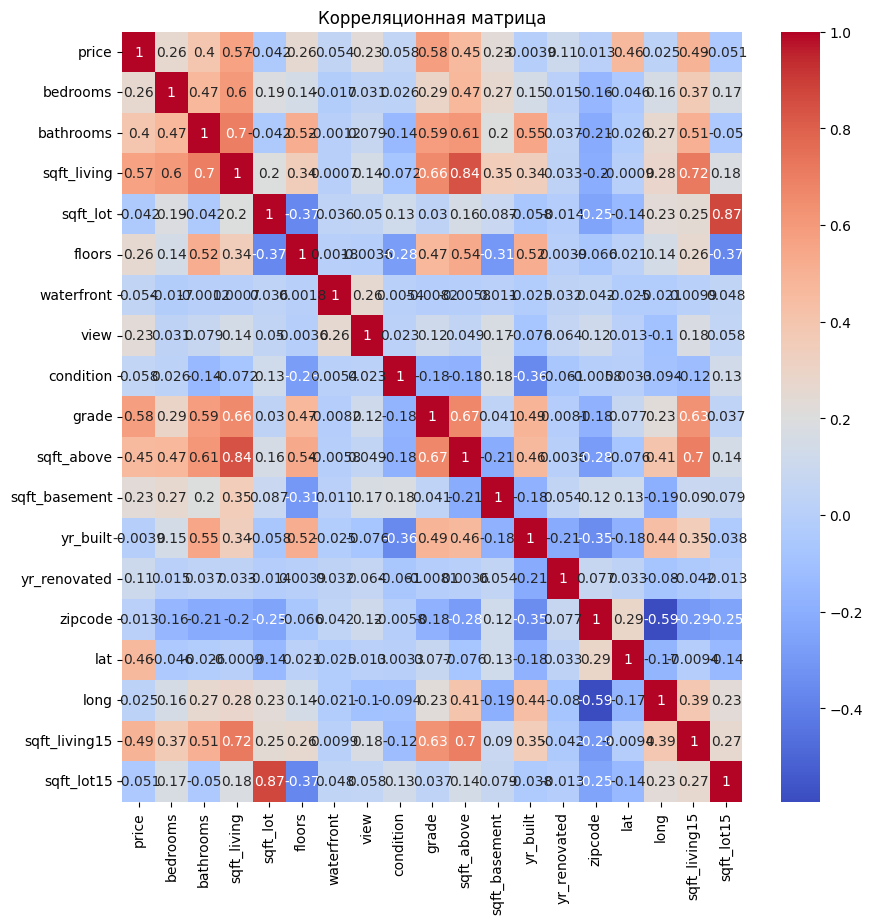

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Рассмотрим признаки. Проведём:
- удаление признаков
- Нормализацию. Поскольку в полиномиальной регрессии есть только одна независимая переменная, которую можно возвести в любую степень, очень важной становится возможность масштабирования признаков, потому что если независимая переменная имеет признаки в диапазоне 100-1000, по второй степени эти признаки будут колебаться между значениями 10000 - 1000000, а в третьей — 10^6 - 10^9. Это очень много.

In [ ]:
# полная: drop_columns = ['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'condition']
# drop_columns = ['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated', 'sqft_above']
# drop_columns = ['sqft_lot15', 'sqft_living']
# drop_columns = ['sqft_lot15', 'sqft_living', 'waterfront']
drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'waterfront']
# drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'waterfront', 'view']
# drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'sqft_lot', 'waterfront', 'condition', 'yr_built', 'yr_renovated', 'long', 'lat']
df_for_poly = df.drop(columns=drop_columns)

#df_for_poly = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living']]
df_for_poly

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
0,221900.0,3,1.00,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340
1,538000.0,3,2.25,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690
2,180000.0,2,1.00,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720
3,604000.0,4,3.00,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360
4,510000.0,3,2.00,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530
21609,400000.0,4,2.50,5813,2.0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830
21610,402101.0,2,0.75,1350,2.0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020
21611,400000.0,3,2.50,2388,2.0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410


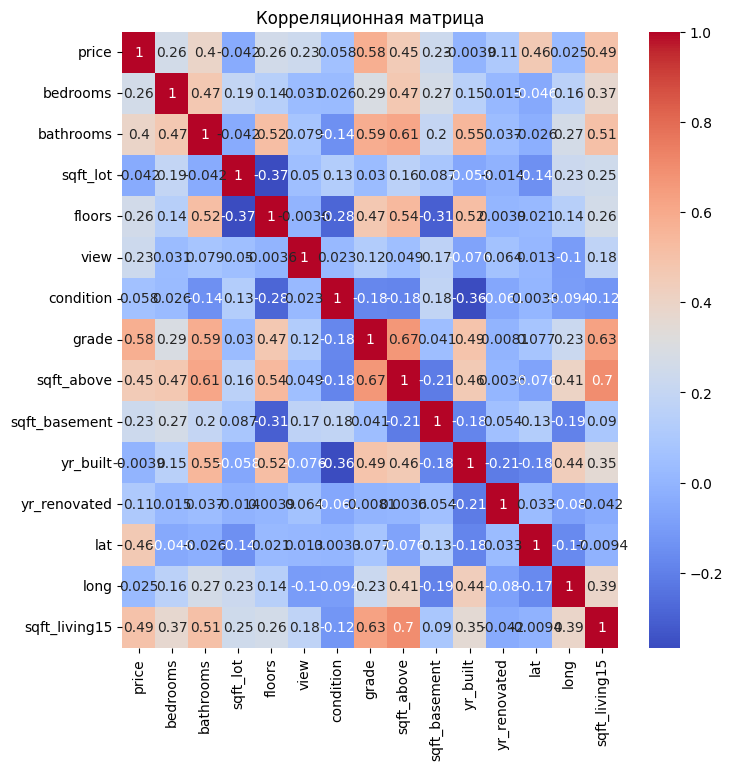

In [ ]:
corr_matrix = df_for_poly.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [ ]:
h_X=df_for_poly.loc[:, ~df_for_poly.columns.isin(['price'])]
h_y=df_for_poly['price']
X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3) # 0.3

Нормализуем

In [ ]:
x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
x_train_norm.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15'],
      dtype='object')

In [ ]:
x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
x_test_norm.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15'],
      dtype='object')

Обучаем. Сначала полином 2 степени

In [ ]:
polynom_d2 = PolynomialFeatures(degree=2)
X_train_polynom = polynom_d2.fit_transform(x_train_norm)
X_test_polynom = polynom_d2.transform(x_test_norm)

model_polynom_d2 = LinearRegression()
model_polynom_d2.fit(X_train_polynom, y_train)
# Проверяем
y_predict_d2 = model_polynom_d2.predict(X_test_polynom)
print("MSE", mean_squared_error(y_test, y_predict_d2))
print("R2", r2_score(y_test, y_predict_d2))

MSE 16635350159.174427
R2 0.5707312402765738


In [ ]:
y_predict_d2_train = model_polynom_d2.predict(X_train_polynom)
print("MSE", mean_squared_error(y_train, y_predict_d2_train))
print("R2", r2_score(y_train, y_predict_d2_train))

MSE 9881738179.494862
R2 0.7476541021529692


In [ ]:
model_polynom_lasso = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha = 1.0))
model_polynom_lasso.fit(X_train_polynom, y_train)
#lasso_reg.fit(X_train, y_train)
y_predict_d2_lasso = model_polynom_lasso.predict(X_test_polynom)
y_predict_d2_lasso_train = model_polynom_lasso.predict(X_train_polynom)
print("MSE", mean_squared_error(y_train, y_predict_d2_lasso_train), mean_squared_error(y_test, y_predict_d2_lasso))
print("R2", r2_score(y_train, y_predict_d2_lasso_train), r2_score(y_test, y_predict_d2_lasso))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.910e+13, tolerance: 4.795e+10
  model = cd_fast.enet_coordinate_descent(


MSE 6063095014.80179 10090043962.431862
R2 0.8451692275740678 0.7420867519580393


полином 3 степени

In [ ]:
polynom_d3 = PolynomialFeatures(degree=3)
X_train_polynom_d3 = polynom_d3.fit_transform(x_train_norm)
X_test_polynom_d3 = polynom_d3.transform(x_test_norm)

model_polynom_d3 = LinearRegression()
model_polynom_d3.fit(X_train_polynom_d3, y_train)
# Проверяем
y_predict_d3 = model_polynom_d3.predict(X_test_polynom_d3)
print("MSE", mean_squared_error(y_test, y_predict_d3))
print("R2", r2_score(y_test, y_predict_d3))

MSE 12105310732.166805
R2 0.690574191637331


In [ ]:
y_predict_d3_train = model_polynom_d3.predict(X_train_polynom_d3)
print("MSE", mean_squared_error(y_train, y_predict_d3_train))
print("R2", r2_score(y_train, y_predict_d3_train))

MSE 6369433740.908934
R2 0.837346381078779


In [ ]:
model_polynom_lasso = make_pipeline(PolynomialFeatures(degree=3), Lasso(alpha = 1.0))
model_polynom_lasso.fit(x_train_norm, y_train)
#lasso_reg.fit(X_train, y_train)
y_predict_d3_lasso = model_polynom_lasso.predict(x_test_norm)
y_predict_d3_lasso_train = model_polynom_lasso.predict(x_train_norm)
print("MSE", mean_squared_error(y_train, y_predict_d3_lasso_train), mean_squared_error(y_test, y_predict_d3_lasso))
print("R2", r2_score(y_train, y_predict_d3_lasso_train), r2_score(y_test, y_predict_d3_lasso))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.798e+13, tolerance: 4.814e+10
  model = cd_fast.enet_coordinate_descent(


MSE 7693286236.9632 13246746588.403996
R2 0.8043306626877996 0.6581728413309869


полином 4 степени

In [ ]:
polynom_d4 = PolynomialFeatures(degree=4)
X_train_polynom_d4 = polynom_d4.fit_transform(x_train_norm)
X_test_polynom_d4 = polynom_d4.transform(x_test_norm)

model_polynom_d4 = LinearRegression()
model_polynom_d4.fit(X_train_polynom_d4, y_train)
# Проверяем
y_predict = model_polynom_d4.predict(X_test_polynom_d4)
print("MSE", mean_squared_error(y_test, y_predict))
print("R2", r2_score(y_test, y_predict))

MSE 2.5895301471991485e+26
R2 -6657491714693556.0


In [ ]:
y_predict_d4_train = model_polynom_d4.predict(X_train_polynom_d4)
print("MSE", mean_squared_error(y_train, y_predict_d4_train))
print("R2", r2_score(y_train, y_predict_d4_train))

MSE 3136724220.918358
R2 0.9200916609756835


# К-ближайших соседей (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

## Весь сет, кроме даты

In [ ]:
df_for_knn = df
df_for_knn

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
h_X=df_for_knn.loc[:, ~df_for_knn.columns.isin(['price'])]
h_y=df_for_knn['price']
X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3)

Нормализуем

In [ ]:
x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
print(len(x_train_norm.columns), len(x_test_norm.columns))

18 18


In [ ]:
x_test_norm.size

94464

Смотрим

In [ ]:
"""
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(x_train_norm, y_train)

y_predicd_knn3 = knn_3.predict(x_test_norm)
print("MSE", mean_squared_error(y_test, y_predicd_knn3))
print("R2", r2_score(y_test, y_predicd_knn3))
"""

'\nknn_3 = KNeighborsRegressor(n_neighbors=3)\nknn_3.fit(x_train_norm, y_train)\n\ny_predicd_knn3 = knn_3.predict(x_test_norm)\nprint("MSE", mean_squared_error(y_test, y_predicd_knn3))\nprint("R2", r2_score(y_test, y_predicd_knn3))\n'

In [ ]:
for i in range(2, 13):
  print("соседи:", str(i))
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train_norm, y_train)

  y_predict_train_knn = knn.predict(x_train_norm)
  y_predict_test_knn = knn.predict(x_test_norm)

  print("MSE", mean_squared_error(y_train, y_predict_train_knn), mean_squared_error(y_test, y_predict_test_knn))
  print("R2", r2_score(y_train, y_predict_train_knn), r2_score(y_test, y_predict_test_knn))
  print()

соседи: 2
MSE 3109819050.80078 10265750907.16592
R2 0.9202443524001435 0.7401977126253678

соседи: 3
MSE 4273791572.4288177 9451958746.398247
R2 0.8903926533995288 0.76079290013059

соседи: 4
MSE 4901360987.845373 9085045179.33202
R2 0.874297760313218 0.7700786294313127

соседи: 5
MSE 5382747356.089128 8869713616.159367
R2 0.8619519353896948 0.7755281706448209

соседи: 6
MSE 5751422575.483458 8765902047.149967
R2 0.8524967451048316 0.7781554000923779

соседи: 7
MSE 6040309151.171679 8686936880.60461
R2 0.8450878458889798 0.7801538248619758

соседи: 8
MSE 6227272244.221324 8581358403.315632
R2 0.8402929165635559 0.7828257706499903

соседи: 9
MSE 6347420558.3194475 8532630718.777963
R2 0.8372115454476193 0.7840589550527521

соседи: 10
MSE 6501517496.923037 8529861297.990219
R2 0.8332595144996064 0.7841290426539287

соседи: 11
MSE 6649209812.856907 8504304719.366935
R2 0.8294717390340869 0.7847758202393038

соседи: 12
MSE 6777039911.034688 8513222043.240763
R2 0.8261933578497229 0.7845501

Здесь лучше всего сработало разделение на 11 соседей

Третий тест

In [ ]:
h_X=df_for_knn.loc[:, ~df_for_knn.columns.isin(['price'])]
h_y=df_for_knn['price']
X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3)

In [ ]:
x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
print(len(x_train_norm.columns), len(x_test_norm.columns))

18 18


In [ ]:
x_test_norm.size

94464

Смотрим

In [ ]:
for i in range(2, 13):
  print("соседи:", str(i))
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train_norm, y_train)

  y_predict_train_knn = knn.predict(x_train_norm)
  y_predict_test_knn = knn.predict(x_test_norm)

  print("MSE", mean_squared_error(y_train, y_predict_train_knn), mean_squared_error(y_test, y_predict_test_knn))
  print("R2", r2_score(y_train, y_predict_train_knn), r2_score(y_test, y_predict_test_knn))
  print()

соседи: 2
MSE 3091545246.9443197 9975622983.181974
R2 0.9207370316287186 0.7473413734955536

соседи: 3
MSE 4227962739.108661 9188505993.047977
R2 0.891600850029234 0.7672771607602539

соседи: 4
MSE 4977897648.453891 8829916843.834543
R2 0.8723735503289617 0.7763593646559312

соседи: 5
MSE 5393014403.172098 8662325514.09891
R2 0.861730527642446 0.7806040514545849

соседи: 6
MSE 5686109150.892217 8512268570.759214
R2 0.8542159814001451 0.7844046342618524

соседи: 7
MSE 5943419018.640334 8440854780.575407
R2 0.8476189102658649 0.7862133744449704

соседи: 8
MSE 6174524627.030675 8387998383.799314
R2 0.8416936803031545 0.7875521003204307

соседи: 9
MSE 6340457359.220542 8421886436.100602
R2 0.837439393254849 0.7866937971584338

соседи: 10
MSE 6498189261.112999 8434627594.405665
R2 0.833395364216878 0.7863710941490217

соседи: 11
MSE 6625719236.045442 8473030118.707625
R2 0.8301256710498601 0.785398450228858

соседи: 12
MSE 6752801048.631547 8519577717.601457
R2 0.8268674681490507 0.78421951

Здесь лучше всего сработало разделение на 8 соседей

Четвёртый тест

In [ ]:
h_X=df_for_knn.loc[:, ~df_for_knn.columns.isin(['price'])]
h_y=df_for_knn['price']
X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3)

In [ ]:
x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
print(len(x_train_norm.columns), len(x_test_norm.columns))

18 18


In [ ]:
x_test_norm.size

94464

Смотрим

In [ ]:
for i in range(2, 13):
  print("соседи:", str(i))
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train_norm, y_train)

  y_predict_train_knn = knn.predict(x_train_norm)
  y_predict_test_knn = knn.predict(x_test_norm)

  print("MSE", mean_squared_error(y_train, y_predict_train_knn), mean_squared_error(y_test, y_predict_test_knn))
  print("R2", r2_score(y_train, y_predict_train_knn), r2_score(y_test, y_predict_test_knn))
  print()

соседи: 2
MSE 3186542679.745569 10157997634.271198
R2 0.9189180221682884 0.7381509985569898

соседи: 3
MSE 4334977318.271144 9090741408.706617
R2 0.8896959588662725 0.7656623238210434

соседи: 4
MSE 4981761590.939577 8579335271.419362
R2 0.8732384519915839 0.7788451568164659

соседи: 5
MSE 5392271230.164401 8403742628.482629
R2 0.8627929827754023 0.7833715172143655

соседи: 6
MSE 5738146394.38449 8228205216.128367
R2 0.853992145875872 0.7878964538993061

соседи: 7
MSE 5989052154.405356 8104749417.212147
R2 0.8476078173679968 0.7910788505519196

соседи: 8
MSE 6202625648.765537 8116106549.186619
R2 0.8421734130384317 0.7907860907213071

соседи: 9
MSE 6395745116.518453 8062426666.158388
R2 0.8372594639792388 0.7921698303395461

соседи: 10
MSE 6570890926.93562 8047408741.071504
R2 0.8328028568834582 0.7925569567033562

соседи: 11
MSE 6685160463.33197 7998109722.388263
R2 0.8298952542093059 0.7938277680659003

соседи: 12
MSE 6779830830.039405 7989265602.553964
R2 0.8274863548641054 0.794055

In [ ]:
for i in range(13, 20):
  print("соседи:", str(i))
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train_norm, y_train)

  y_predict_train_knn = knn.predict(x_train_norm)
  y_predict_test_knn = knn.predict(x_test_norm)

  print("MSE", mean_squared_error(y_train, y_predict_train_knn), mean_squared_error(y_test, y_predict_test_knn))
  print("R2", r2_score(y_train, y_predict_train_knn), r2_score(y_test, y_predict_test_knn))
  print()

соседи: 13
MSE 6896701543.532066 8039397121.121553
R2 0.8245125649127514 0.7927634771968005

соседи: 14
MSE 7013973068.651 8074564896.534147
R2 0.8215285762593361 0.7918569356512806

соседи: 15
MSE 7111733541.5845785 8069734703.829783
R2 0.8190410487739515 0.7919814465226109

соседи: 16
MSE 7196107272.198852 8113590635.569615
R2 0.816894148624542 0.790850944986099

соседи: 17
MSE 7284197510.717228 8120864854.367976
R2 0.8146526814657505 0.7906634329392166

соседи: 18
MSE 7357024246.320568 8121011884.878612
R2 0.8127995960514929 0.7906596428426074

соседи: 19
MSE 7427375420.333357 8160513844.657063
R2 0.8110095016121505 0.789641376340149



Здесь на тестовой выборке лучше всего сработала модель для 12 соседей. Пришлось даже смотреть, какие значения r2 и mse получаются при большем количестве соседей, однако уже с 13 мы получаем менее хорошие результаты.

Пятый тест

In [ ]:
h_X=df_for_knn.loc[:, ~df_for_knn.columns.isin(['price'])]
h_y=df_for_knn['price']
X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3)

In [ ]:
x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
print(len(x_train_norm.columns), len(x_test_norm.columns))

18 18


In [ ]:
x_test_norm.size

94464

Смотрим

In [ ]:
for i in range(2, 13):
  print("соседи:", str(i))
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train_norm, y_train)

  y_predict_train_knn = knn.predict(x_train_norm)
  y_predict_test_knn = knn.predict(x_test_norm)

  print("MSE", mean_squared_error(y_train, y_predict_train_knn), mean_squared_error(y_test, y_predict_test_knn))
  print("R2", r2_score(y_train, y_predict_train_knn), r2_score(y_test, y_predict_test_knn))
  print()

соседи: 2
MSE 3228015931.622856 10751827774.547209
R2 0.918316397146349 0.719158167515039

соседи: 3
MSE 4417816745.530636 9735221873.314743
R2 0.8882089815645017 0.7457123004684172

соседи: 4
MSE 5099195859.681385 9211244865.062452
R2 0.8709669659945596 0.7593987792944564

соседи: 5
MSE 5545545175.042705 9019619293.364443
R2 0.8596722818968751 0.7644041121397283

соседи: 6
MSE 5839797352.522289 8834235216.656446
R2 0.8522263527214324 0.7692464147610051

соседи: 7
MSE 6128499894.832363 8706385073.091152
R2 0.8449208547597047 0.7725859091572362

соседи: 8
MSE 6368459884.015269 8683032696.580414
R2 0.8388487668665917 0.7731958821171528

соседи: 9
MSE 6476079554.147116 8651205718.177328
R2 0.8361254957983875 0.7740272149030389

соседи: 10
MSE 6605361249.1374655 8612264002.981102
R2 0.8328540761853717 0.7750443873210817

соседи: 11
MSE 6721664314.509186 8605270620.723433
R2 0.8299110754060324 0.7752270571265971

соседи: 12
MSE 6852376879.144125 8584528993.582698
R2 0.8266034482307678 0.775

In [ ]:
for i in range(13, 20):
  print("соседи:", str(i))
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train_norm, y_train)

  y_predict_train_knn = knn.predict(x_train_norm)
  y_predict_test_knn = knn.predict(x_test_norm)

  print("MSE", mean_squared_error(y_train, y_predict_train_knn), mean_squared_error(y_test, y_predict_test_knn))
  print("R2", r2_score(y_train, y_predict_train_knn), r2_score(y_test, y_predict_test_knn))
  print()

соседи: 13
MSE 6943998282.9243555 8615067160.609331
R2 0.8242850066499929 0.7749711677772457

соседи: 14
MSE 7032110556.685522 8620593367.511658
R2 0.8220553621473337 0.7748268211502642

соседи: 15
MSE 7125105095.403846 8640083422.230303
R2 0.8197021739570861 0.7743177335051502

соседи: 16
MSE 7196896145.919833 8652462919.98999
R2 0.8178855312319536 0.7739943763133336

соседи: 17
MSE 7262791322.269932 8691430318.772095
R2 0.8162180811545785 0.7729765330302552

соседи: 18
MSE 7338994371.460013 8704229486.34802
R2 0.8142897946348926 0.7726422139031561

соседи: 19
MSE 7394372987.585621 8691277522.368805
R2 0.8128884617474447 0.7729805241304473



Аналогично предыдущей попытке.

Т.о., самым хорошим результатом можно считать 4 попытку при k = 12:

MSE -- 6779830830.039405 и 7989265602.553964

R2 -- 0.8274863548641054 и 0.7940557484248876

## Без столбцов 'sqft_lot15', 'sqft_living', 'zipcode', 'waterfront', 'date'

In [ ]:
drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'waterfront']

df_2_for_knn = df.drop(columns=drop_columns)
df_2_for_knn

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
0,221900.0,3,1.00,5650,1.0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340
1,538000.0,3,2.25,7242,2.0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690
2,180000.0,2,1.00,10000,1.0,0,3,6,770,0,1933,0,47.7379,-122.233,2720
3,604000.0,4,3.00,5000,1.0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360
4,510000.0,3,2.00,8080,1.0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530
21609,400000.0,4,2.50,5813,2.0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830
21610,402101.0,2,0.75,1350,2.0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020
21611,400000.0,3,2.50,2388,2.0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410


In [ ]:
min_mse = {"mse": 99999999999, "round": 0, "neighbours": 0, "mse_test": 99999999999, "round_test": 0, "neighbours_test": 0}
max_r2 = {"r2": np.float64(0.0), "round": 0, "neighbours": 0, "r2_test": np.float64(0.0), "round_test": 0, "neighbours_test": 0}
for round in range(1, 6):
  print("Цикл", round)
  h_X=df_2_for_knn.loc[:, ~df_2_for_knn.columns.isin(['price'])]
  h_y=df_2_for_knn['price']
  X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3)
  # Нормализуем
  x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
  x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)
  # Смотрим
  for i in range(2, 15):
    print("соседи:", str(i))
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train_norm, y_train)

    y_predict_train_knn = knn.predict(x_train_norm)
    y_predict_test_knn = knn.predict(x_test_norm)

    mse_train = mean_squared_error(y_train, y_predict_train_knn)
    mse_test = mean_squared_error(y_test, y_predict_test_knn)
    r2_train = r2_score(y_train, y_predict_train_knn)
    r2_test = r2_score(y_test, y_predict_test_knn)

    if mse_train < min_mse["mse"]:
      min_mse["mse"] = mse_train
      min_mse["round"] = round
      min_mse["neighbours"] = i

    if mse_test < min_mse["mse_test"]:
      min_mse["mse_test"] = mse_test
      min_mse["round_test"] = round
      min_mse["neighbours_test"] = i

    if r2_train > max_r2["r2"]:
      max_r2["r2"] = r2_train
      max_r2["round"] = round
      max_r2["neighbours"] = i

    if r2_test > max_r2["r2_test"]:
      max_r2["r2_test"] = r2_test
      max_r2["round_test"] = round
      max_r2["neighbours_test"] = i

    print("MSE (train, test)", mse_train, mse_test)
    print("R2 (train, test)", r2_train, r2_test)

Цикл 1
соседи: 2
MSE (train, test) 3355183058.245426 11253115445.100468
R2 (train, test) 0.913515941376266 0.7183725133320982
соседи: 3
MSE (train, test) 4490848864.234409 10222640915.504341
R2 (train, test) 0.884242728428689 0.7441618117056255
соседи: 4
MSE (train, test) 5146804107.580733 9862683624.398926
R2 (train, test) 0.8673346579194824 0.7531703274092427
соседи: 5
MSE (train, test) 5578588300.254793 9475526581.667044
R2 (train, test) 0.8562048778795364 0.7628595610638952
соседи: 6
MSE (train, test) 5903423832.622602 9192156723.917858
R2 (train, test) 0.8478318339243548 0.7699513518861506
соседи: 7
MSE (train, test) 6159308883.256406 9140644953.039879
R2 (train, test) 0.8412360752620767 0.7712405175964778
соседи: 8
MSE (train, test) 6384042614.414848 9040475237.920895
R2 (train, test) 0.835443280996359 0.7737474273715377
соседи: 9
MSE (train, test) 6533378512.916392 8971069880.461222
R2 (train, test) 0.831593960593737 0.775484409141432
соседи: 10
MSE (train, test) 6708424679.3634

In [ ]:
print("Обучение")
print(f"Наименьший mse = {min_mse['mse']} в цикле {min_mse['round']} при исп. {min_mse['neighbours']} соседей")
print(f"Наибольший r2 = {max_r2['r2']} в цикле {max_r2['round']} при исп. {max_r2['neighbours']} соседей")

print("Тестирование")
print(f"Наименьший mse = {min_mse['mse_test']} в цикле {min_mse['round_test']} при {min_mse['neighbours_test']} соседей")
print(f"Наибольший r2 = {max_r2['r2_test']} в цикле {max_r2['round_test']} при {max_r2['neighbours_test']} соседей")

Обучение
Наименьший mse = 3283939170.9970393 в цикле 2 при исп. 2 соседей
Наибольший r2 = 0.9161469085301573 в цикле 2 при исп. 2 соседей
Тестирование
Наименьший mse = 8373007524.672247 в цикле 3 при 9 соседей
Наибольший r2 = 0.7827873270574953 в цикле 4 при 10 соседей


В целом, результаты близки к тем, которые были получены в предыдущем пункте, хоть и немного ниже.